<a href="https://colab.research.google.com/github/sangramdhurve/Unsupervised-Machine-Learning/blob/main/ASSESSMENT14_05_2022_PCA_SVD_T_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**We are going to check here accuracy of model and try to find which DAta reduction technique is best for accuracy on linear data set**

**-----------------------------^ Start ^---------------------------------**

#1)Let us first import all the necessary libraries

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#2)Loading the dataset
To import the dataset we will use Pandas library.It is the best Python library to play with the dataset and has a lot of functionalities.

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df = pd.read_csv('/content/drive/MyDrive/Python projects/Machine Learning Algorithms/Unsupervised L/Pokemon.csv')
#https://drive.google.com/file/d/1au4pRUbHAkOmlERBvRhMi-vi5kUssBV-/view?usp=sharing
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


**^-------------------------------------------------Preprocessing-----------------------------------------^**

In [48]:
df = df.rename(columns = {df.columns[0]: 'Index'})

In [49]:
df = df.set_index("Index")

In [50]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


#df.columns.tolist() fetches all the columns and then convert it into list type.This step is just to check out all the column names in our data.Columns are also called as features of our datasets

In [51]:
df.shape

(800, 12)

In [52]:
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

#Doing some visualisation before moving onto PCA

In [53]:
print(df['Type 2'].unique())
print(df['Type 2'].value_counts())

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


In [54]:
df.fillna('Flying')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Index,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


#df.corr() compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.Positive values shows as one variable increases other variable increases as well. Negative values shows as one variable increases other variable decreases.Bigger the values,more strongly two varibles are correlated and viceversa.

In [55]:
#Visualising correlation using Seaborn library
df.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

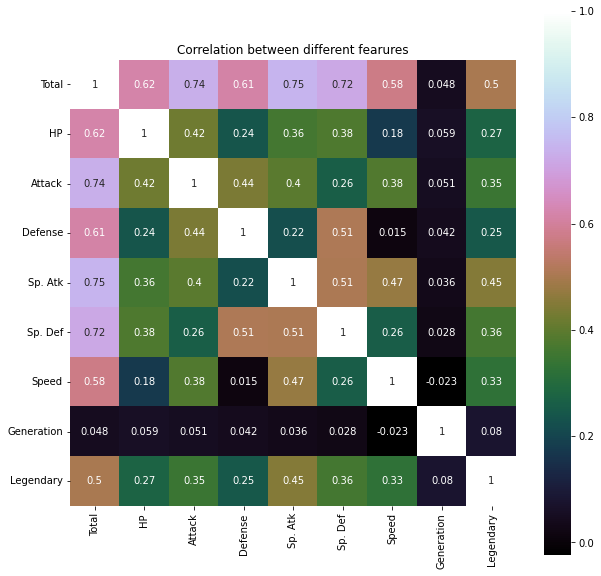

In [56]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df['Name']=le.fit_transform(df['Name'])
df['Type 1']=le.fit_transform(df['Type 1'])
df['Type 2']=le.fit_transform(df['Type 2'])
df['Legendary']=le.fit_transform(df['Legendary'])

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [59]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Index,,,,,,,,,,,,
1,Bulbasaur,9,13,318,45,49,49,65,65,45,1,0
2,Ivysaur,9,13,405,60,62,63,80,80,60,1,0
3,Venusaur,9,13,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,9,13,625,80,100,123,122,120,80,1,0
4,Charmander,6,18,309,39,52,43,60,50,65,1,0


In [60]:
df['Generation'].unique()

array([1, 2, 3, 4, 5, 6])

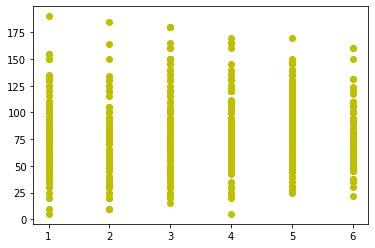

In [61]:
import matplotlib.pyplot as plt
plt.scatter(df['Generation'], df['Attack'], c='y')
plt.show()

In [62]:
x = df.iloc[:,1:11]
y = df['Legendary']


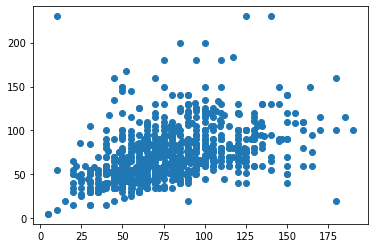

In [63]:
import matplotlib.pyplot as plt
a = df['Attack']
b = df['Defense']
plt.scatter(a,b)
plt.show()

In [64]:
#Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1=scaler.fit_transform(x)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 10)
(160, 10)
(640,)
(160,)


**^--------------------------------------------------------------------Testing Model--------------------------------------------------------------^**

#**[1]**
**0.96875 it is higher Accuracy**,
its changes every time

#**Accuracy before putting any Dimention reduction technique**

#**We are using here RandomForestClassifier to check the model accuracy**


In [67]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.95625

#Fitting and tranforming the data set into desired number of dimensionas by controlling the paramter n_components 

#Important functions corresponding to implementation of PCA are:

#Fit : fits the data to the required number of PCs
#Transform: transform the data along PCs discovered

**-------------------------------------------------------PCA---------------------------------------------**

#**[2]**
**0.95 Accuracy**

#**PCA Model**

In [68]:
from sklearn.decomposition import PCA

pca = PCA(0.94)
X_pca = pca.fit_transform(x)
X_pca

array([[-1.25854753e+02, -5.21722285e+00,  1.90286984e+01,
        -1.00724333e+00],
       [-3.21288666e+01, -5.76719484e+00,  2.08588587e+01,
         1.73373269e-01],
       [ 9.72234215e+01, -5.38151903e+00,  2.13954604e+01,
         1.31576132e+00],
       ...,
       [ 1.81140322e+02, -2.75784680e+01,  3.66499865e+01,
         1.81955283e+01],
       [ 2.69417786e+02, -3.74899149e+01,  6.10381416e+00,
         1.65028425e+01],
       [ 1.79956704e+02,  1.47673952e+01,  9.80096900e+00,
        -4.03047308e+00]])

**Co-Variance checking** inside the PCA

In [69]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = X_pca
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[-1.25854753e+02 -5.21722285e+00  1.90286984e+01 -1.00724333e+00]
 [-3.21288666e+01 -5.76719484e+00  2.08588587e+01  1.73373269e-01]
 [ 9.72234215e+01 -5.38151903e+00  2.13954604e+01  1.31576132e+00]
 ...
 [ 1.81140322e+02 -2.75784680e+01  3.66499865e+01  1.81955283e+01]
 [ 2.69417786e+02 -3.74899149e+01  6.10381416e+00  1.65028425e+01]
 [ 1.79956704e+02  1.47673952e+01  9.80096900e+00 -4.03047308e+00]]
[-2.04636308e-14 -1.49213975e-15  5.32907052e-16 -1.63424829e-15]
[[-1.25854753e+02 -5.21722285e+00  1.90286984e+01 -1.00724333e+00]
 [-3.21288666e+01 -5.76719484e+00  2.08588587e+01  1.73373269e-01]
 [ 9.72234215e+01 -5.38151903e+00  2.13954604e+01  1.31576132e+00]
 ...
 [ 1.81140322e+02 -2.75784680e+01  3.66499865e+01  1.81955283e+01]
 [ 2.69417786e+02 -3.74899149e+01  6.10381416e+00  1.65028425e+01]
 [ 1.79956704e+02  1.47673952e+01  9.80096900e+00 -4.03047308e+00]]
[[ 1.68563630e+04 -4.37103837e-13 -1.43424696e-13 -1.73020269e-13]
 [-4.37103837e-13  1.00711240e+03  3.14168383e-13  

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=30)

#**Accuracy of model after applying PCA**

In [71]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.93125

In [72]:
# pca = PCA(n_components=11) # it will transform the existing data set into new dimensioans called PCs
# pca.fit(df) 
# data_new = pca.transform(df)
# print(data_new.shape)

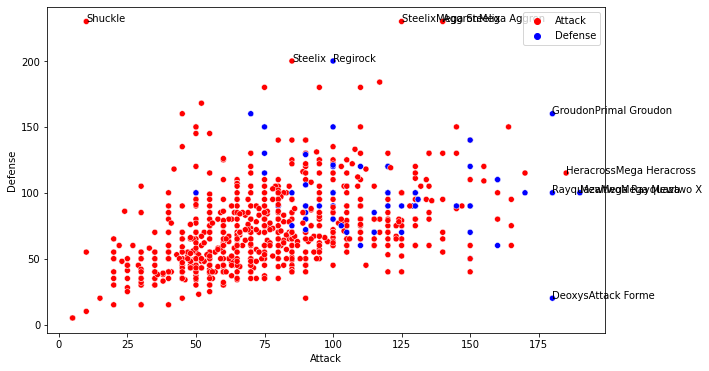

In [73]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='Attack',y='Defense',data=df,hue='Legendary',palette=['red','blue'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Attack", "Defense"])

top5_weight_height_merged = pd.concat([df.nlargest(5, 'Defense'), df.nlargest(5, 'Attack')]).drop_duplicates(subset=['Name'])
for index, row in top5_weight_height_merged.iterrows():
    plt.annotate(row['Name'], xy=(row['Attack'], row['Defense']), fontsize=10)

**^---------------------------------------------------------------SVD--------------------------------------------------------------^**

#**[3]**
**100% Accuracy**

#**SVD Model**

In [74]:
from numpy import diag
from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd

In [75]:
data= df
data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Index,,,,,,,,,,,,
1,Bulbasaur,9,13,318,45,49,49,65,65,45,1,0
2,Ivysaur,9,13,405,60,62,63,80,80,60,1,0
3,Venusaur,9,13,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,9,13,625,80,100,123,122,120,80,1,0
4,Charmander,6,18,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,15,4,600,50,100,150,100,150,50,6,1
719,DiancieMega Diancie,15,4,700,50,160,110,160,110,110,6,1
720,HoopaHoopa Confined,14,8,600,80,110,60,150,130,70,6,1


In [76]:
data['Name']=le.fit_transform(data['Name'])


In [77]:
svd = TruncatedSVD(n_components=11)
result = svd.fit_transform(data)
print(result)

[[ 3.05796049e+02  1.76471167e+02 -2.99246692e+00 ...  5.07376990e-01
  -1.24450838e+00 -8.03442819e-02]
 [ 5.44412928e+02  5.87101877e+01 -5.11453591e+00 ...  1.72704655e-01
  -1.89971294e+00 -1.28623962e-01]
 [ 9.23116640e+02 -1.56655203e+02 -7.15076490e+00 ... -1.57743230e-01
  -2.86273630e+00 -1.93405858e-01]
 ...
 [ 6.88248982e+02  2.14842800e+02 -2.89152862e+01 ...  7.56986783e+00
   2.53561715e+00  6.86295361e-01]
 [ 7.52334336e+02  2.74098458e+02 -3.96933731e+01 ...  1.15019264e+01
   2.54426584e+00  5.58925657e-01]
 [ 9.90300066e+02 -1.08495467e+02  1.20527490e+01 ... -5.69502254e+00
   1.60642769e+00  7.93364601e-01]]


In [78]:
sigma= svd.singular_values_
left_matrix= result/svd.singular_values_
right_matrix = svd.components_
print(sigma)
print(left_matrix)
print(right_matrix)
print(sigma.shape)
print(left_matrix.shape)
print(right_matrix.shape)

[1.81468679e+04 5.60739327e+03 8.97564323e+02 7.63560084e+02
 6.48920332e+02 5.83477262e+02 4.36474094e+02 1.98759214e+02
 1.54770291e+02 5.03111479e+01 6.93574902e+00]
[[ 0.01685118  0.03147116 -0.00333399 ...  0.00327826 -0.02473623
  -0.01158408]
 [ 0.03000038  0.01047014 -0.00569824 ...  0.00111588 -0.03775928
  -0.01854507]
 [ 0.0508692  -0.02793726 -0.00796686 ... -0.00101921 -0.05690064
  -0.02788536]
 ...
 [ 0.0379266   0.0383142  -0.03221528 ...  0.04891034  0.05039871
   0.09895043]
 [ 0.04145808  0.04888162 -0.04422343 ...  0.07431611  0.05057062
   0.0805862 ]
 [ 0.0545714  -0.01934865  0.01342828 ... -0.03679661  0.03192986
   0.11438773]]
[[ 6.82908030e-01  1.40645047e-02  1.95396898e-02  6.75814077e-01
   1.07254327e-01  1.22793434e-01  1.14669222e-01  1.13859667e-01
   1.11514164e-01  1.05723263e-01  4.97310983e-03  1.58143564e-04]
 [-7.30288377e-01  8.96129976e-03  7.88020624e-03  6.31675531e-01
   8.80304431e-02  1.24255653e-01  1.01566571e-01  1.18470744e-01
   1.068

In [79]:
s= diag(svd.singular_values_)
new_data = np.dot(result, right_matrix)
new_data = np.round(new_data,2)
print(new_data)
print(df.values)

[[ 80.   9.  13. ...  45.   1.   0.]
 [329.   9.  13. ...  60.   1.   0.]
 [745.   9.  13. ...  80.   1.   0.]
 ...
 [314.  14.   8. ...  70.   6.   1.]
 [315.  14.   1. ...  80.   6.   1.]
 [756.   6.  17. ...  70.   6.   1.]]
[[ 80   9  13 ...  45   1   0]
 [329   9  13 ...  60   1   0]
 [745   9  13 ...  80   1   0]
 ...
 [314  14   8 ...  70   6   1]
 [315  14   1 ...  80   6   1]
 [756   6  17 ...  70   6   1]]


In [80]:
data_diff = np.subtract(data, new_data)
data_squarediff = np.square(data_diff)
print('Frobenius Norm = ', np.sqrt(data_squarediff.sum()))

Frobenius Norm =  Name          0.0
Type 1        0.0
Type 2        0.0
Total         0.0
HP            0.0
Attack        0.0
Defense       0.0
Sp. Atk       0.0
Sp. Def       0.0
Speed         0.0
Generation    0.0
Legendary     0.0
dtype: float64


In [81]:
a_train, a_test, b_train, b_test = train_test_split(result,y, test_size=0.2, random_state=30)

#**We are using here RandomForestClassifier to check the model accuracy after applying SVD**

In [82]:
model_rf = RandomForestClassifier()
model_rf.fit(a_train, b_train)
model_rf.score(a_test, b_test)

1.0

**^-------------------------------------------------------------------T-SNE------------------------------------------------------------^**

#**[4]**
**0.94375 Accuracy**,
we tested here highest 0.944%, if we run further it changes every time.

#**TSNE model**

In [83]:
# loading TSNE model from Sklearn
from sklearn.manifold import TSNE

In [84]:
# Using TSNE to reduce to 2 features as indicated by first argument
tsne = TSNE(n_components=2)
# transforming the data set to 2 dimensions
New_points = tsne.fit_transform(data.iloc[:,0:11])
# creating dataframe of new transformed data points in two features
Tsne_points =pd.DataFrame(New_points, columns= ['Attack',	'Defense']
                         )
# concatinating data frame with class labels in original data set
# Tsne_model = pd.concat([Tsne_points,data.iloc[:,11]], axis = 1)

# printing the new data set

print(Tsne_points)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


        Attack    Defense
0    20.491352 -25.430527
1     6.494437  -6.998774
2   -15.985670  31.304026
3   -21.087217  32.650993
4    20.494549 -24.556267
..         ...        ...
795  -8.756865 -30.575724
796 -10.306423 -35.864830
797 -17.776403  -9.840145
798 -22.683039  -7.370567
799 -20.579264  32.733280

[800 rows x 2 columns]


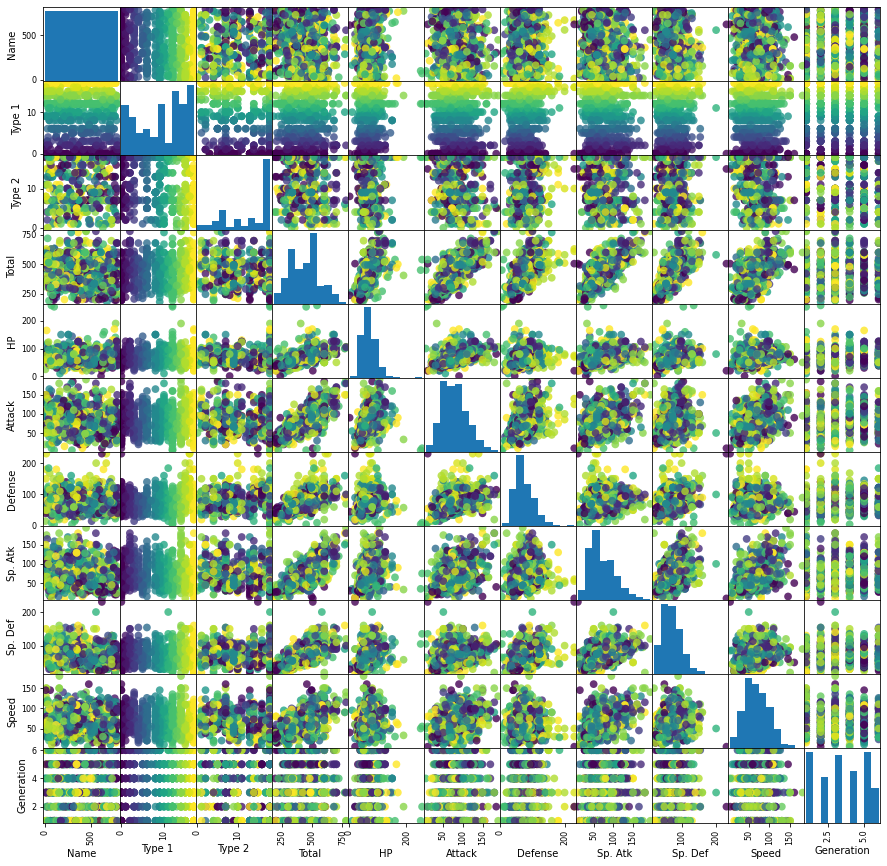

In [85]:
grr = pd.plotting.scatter_matrix(data.iloc[:,0:11], c=data.iloc[:,-11], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 10}, s=60, alpha=.8)

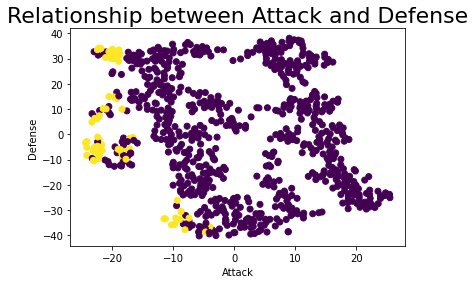

In [86]:
plt.scatter(Tsne_points['Attack'], Tsne_points['Defense'], c=data['Legendary']) 
plt.title("Relationship between Attack and Defense", fontsize=22)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

In [87]:
m_train, m_test, n_train, n_test = train_test_split(Tsne_points,y, test_size=0.2, random_state=30)

In [88]:
model_rf = RandomForestClassifier()
model_rf.fit(m_train, n_train)
model_rf.score(m_test, n_test)

0.9375

#**Basic Outcome and Report**

**Respected sir as you saw in above practical what I have done, 4 practicals here on linear dataset of pokemon we have tested accuraccy in randomforestclassifier model of sklearn,

1- Without any data reduction technique

2- after appling SVD technique

3- after appling PCA

4- after appling T-SNE technique

we have applied all the models and tested with randomforestclassifier to check which is best and we got on leaner dataset SVD is works better here is accuracy is 100%.

#**^---------------------------------------END---------------------------------------------------^**